Comparison of DnCNN Variants for Image Denoising
================================================

This example demonstrates the solution of an image denoising problem
using DnCNN <cite data-cite="zhang-2017-dncnn"/> networks trained for different noise
levels, as well as custom variants with fewer network layers, and  with a
noise level input.

The networks trained for specific noise levels are labeled 6L, 6M, 6H,
17L, 17M, and 17H, where {6, 17} denote the number of layers, and {L, M,
H} represent noise standard deviation of the training images (0.06, 0.10,
and 0.20 respectively). The networks with a noise standard deviation
input are labeled 6N and 17N, where {6, 17} again denote the number of
layers.

In [1]:
import numpy as np

import jax

from xdesign import Foam, discrete_phantom

import scico.random
from scico import metric, plot
from scico.denoiser import DnCNN
plot.config_notebook_plotting()

Create a ground truth image.

In [2]:
np.random.seed(1234)
N = 512  # image size
x_gt = discrete_phantom(Foam(size_range=[0.075, 0.0025], gap=1e-3, porosity=1), size=N)
x_gt = jax.device_put(x_gt)  # convert to jax array, push to GPU

Test different DnCNN variants on images with different noise levels.

In [3]:
print("  σ   | variant | noisy image PSNR (dB)   | denoised image PSNR (dB)")
for σ in [0.06, 0.10, 0.20]:
    print("------+---------+-------------------------+-------------------------")
    for variant in ["17L", "17M", "17H", "17N", "6L", "6M", "6H", "6N"]:

        # Instantiate a DnCNN.
        denoiser = DnCNN(variant=variant)

        # Generate a noisy image.
        noise, key = scico.random.randn(x_gt.shape, seed=0)
        y = x_gt + σ * noise

        if variant in ["6N", "17N"]:
            x_hat = denoiser(y, sigma=σ)
        else:
            x_hat = denoiser(y)

        x_hat = np.clip(x_hat, a_min=0, a_max=1.0)

        if variant[0] == "6":
            variant += " "  # add spaces to maintain alignment

        print(
            " %.2f | %s     |          %.2f          |          %.2f          "
            % (σ, variant, metric.psnr(x_gt, y), metric.psnr(x_gt, x_hat))
        )

  σ   | variant | noisy image PSNR (dB)   | denoised image PSNR (dB)
------+---------+-------------------------+-------------------------


 0.06 | 17L     |          24.43          |          33.82          


 0.06 | 17M     |          24.43          |          33.94          


 0.06 | 17H     |          24.43          |          26.32          


 0.06 | 17N     |          24.43          |          35.48          


 0.06 | 6L      |          24.43          |          33.80          


 0.06 | 6M      |          24.43          |          29.76          


 0.06 | 6H      |          24.43          |          26.86          


 0.06 | 6N      |          24.43          |          36.30          
------+---------+-------------------------+-------------------------


 0.10 | 17L     |          19.99          |          27.43          


 0.10 | 17M     |          19.99          |          31.82          


 0.10 | 17H     |          19.99          |          26.44          


 0.10 | 17N     |          19.99          |          30.30          


 0.10 | 6L      |          19.99          |          27.87          


 0.10 | 6M      |          19.99          |          27.45          


 0.10 | 6H      |          19.99          |          26.52          


 0.10 | 6N      |          19.99          |          33.09          
------+---------+-------------------------+-------------------------


 0.20 | 17L     |          13.97          |          18.37          


 0.20 | 17M     |          13.97          |          20.12          


 0.20 | 17H     |          13.97          |          25.97          


 0.20 | 17N     |          13.97          |          21.38          


 0.20 | 6L      |          13.97          |          18.70          


 0.20 | 6M      |          13.97          |          20.70          


 0.20 | 6H      |          13.97          |          24.78          


 0.20 | 6N      |          13.97          |          25.71          


Show reference and denoised images for σ=0.2 and variant=6N.

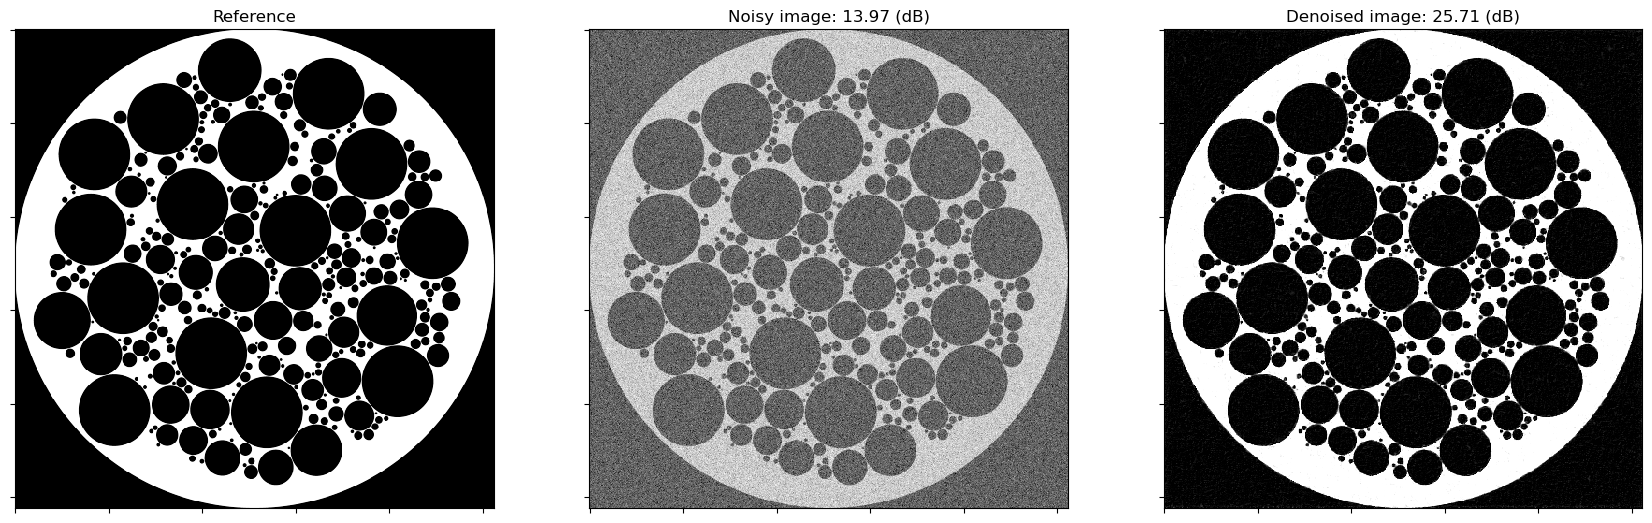

In [4]:
fig, ax = plot.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(21, 7))
plot.imview(x_gt, title="Reference", fig=fig, ax=ax[0])
plot.imview(y, title="Noisy image: %.2f (dB)" % metric.psnr(x_gt, y), fig=fig, ax=ax[1])
plot.imview(x_hat, title="Denoised image: %.2f (dB)" % metric.psnr(x_gt, x_hat), fig=fig, ax=ax[2])
fig.show()